In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [36]:
# Load dataset
wine = load_wine()

In [37]:
X = wine.data
y = wine.target

In [38]:
df = pd.DataFrame(X, columns=wine.feature_names)
df['target'] = y

In [39]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [40]:
# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
# Create Decision Tree model
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)

In [42]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [43]:
y_pred = dt_model.predict(X_test)

In [44]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.94
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.88      1.00      0.93        14
           2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36

Confusion Matrix:
 [[13  1  0]
 [ 0 14  0]
 [ 0  1  7]]


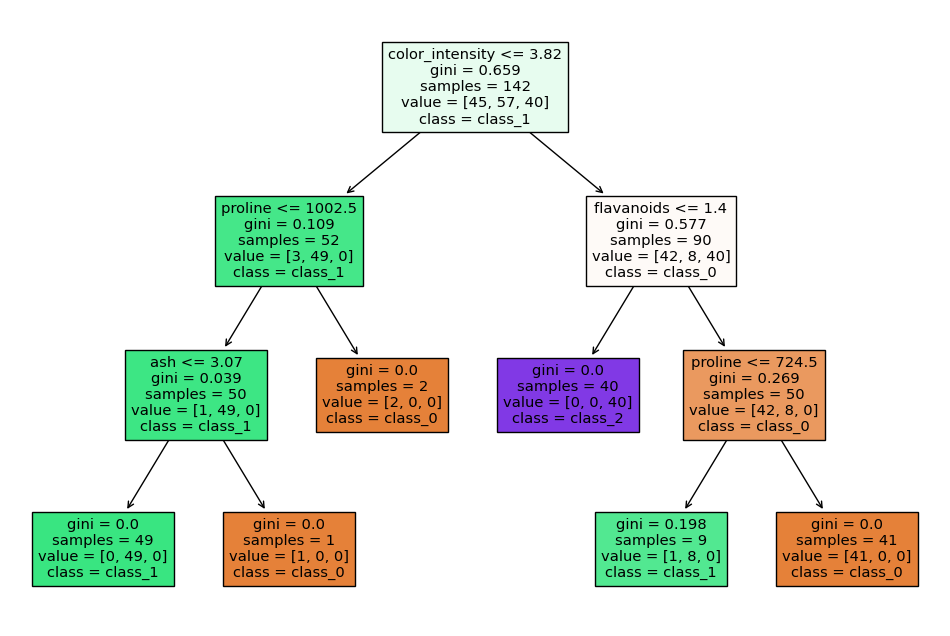

In [45]:
plt.figure(figsize=(12, 8))
plot_tree(dt_model, feature_names=wine.feature_names, class_names=wine.target_names, filled=True)
plt.show()

Pre-Pruning

In [46]:
pre_pruned_tree = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_split=5, random_state=42)
pre_pruned_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=5, random_state=42)

In [47]:
#Predict
y_pred_pre = pre_pruned_tree.predict(X_test)

In [48]:
# Evaluation
print("Pre-Pruning Accuracy:", accuracy_score(y_test, y_pred_pre))
print("\nClassification Report:\n", classification_report(y_test, y_pred_pre))

Pre-Pruning Accuracy: 0.9444444444444444

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.88      1.00      0.93        14
           2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



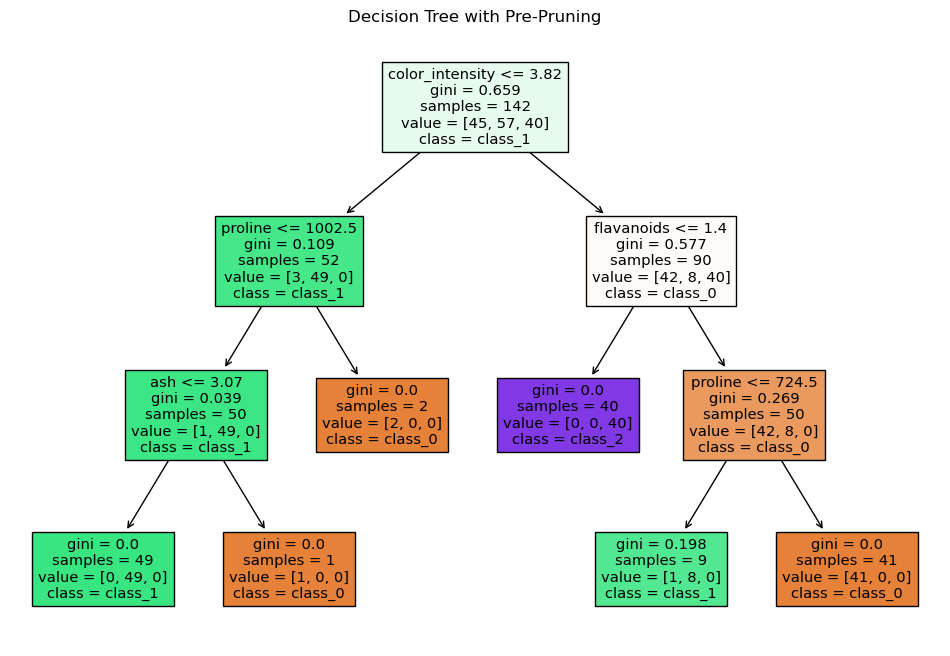

In [49]:
# Visualize Pre-Pruned Tree
plt.figure(figsize=(12, 8))
plot_tree(pre_pruned_tree, feature_names=wine.feature_names, class_names=wine.target_names, filled=True)
plt.title("Decision Tree with Pre-Pruning")
plt.show()

Post-Pruning

In [50]:
full_tree = DecisionTreeClassifier(random_state=42)
full_tree.fit(X_train, y_train)

path = full_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

print("CCP Alphas:",ccp_alphas)

CCP Alphas: [0.         0.01251956 0.01380282 0.026013   0.08212833 0.26231586]


In [51]:
pruned_trees = []
train_acc = []
test_acc = []

for alpha in ccp_alphas:
    pruned_tree = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    pruned_tree.fit(X_train, y_train)
    pruned_trees.append(pruned_tree)
    
    train_acc.append(pruned_tree.score(X_train, y_train))
    test_acc.append(pruned_tree.score(X_test, y_test))


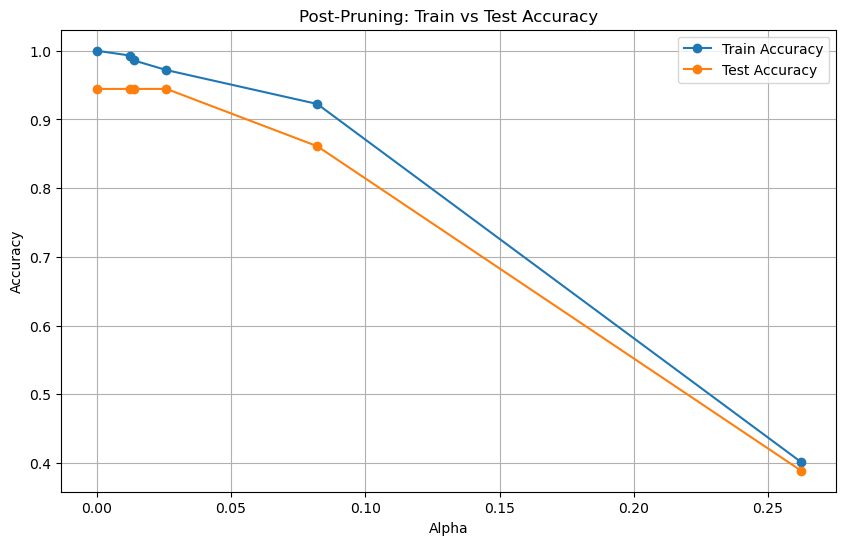

In [52]:
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_acc, marker='o', label='Train Accuracy')
plt.plot(ccp_alphas, test_acc, marker='o', label='Test Accuracy')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.title('Post-Pruning: Train vs Test Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Final Pruned Tree with Best Alpha

In [53]:
best_alpha = ccp_alphas[np.argmax(test_acc)]

In [54]:
final_pruned_tree = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
final_pruned_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

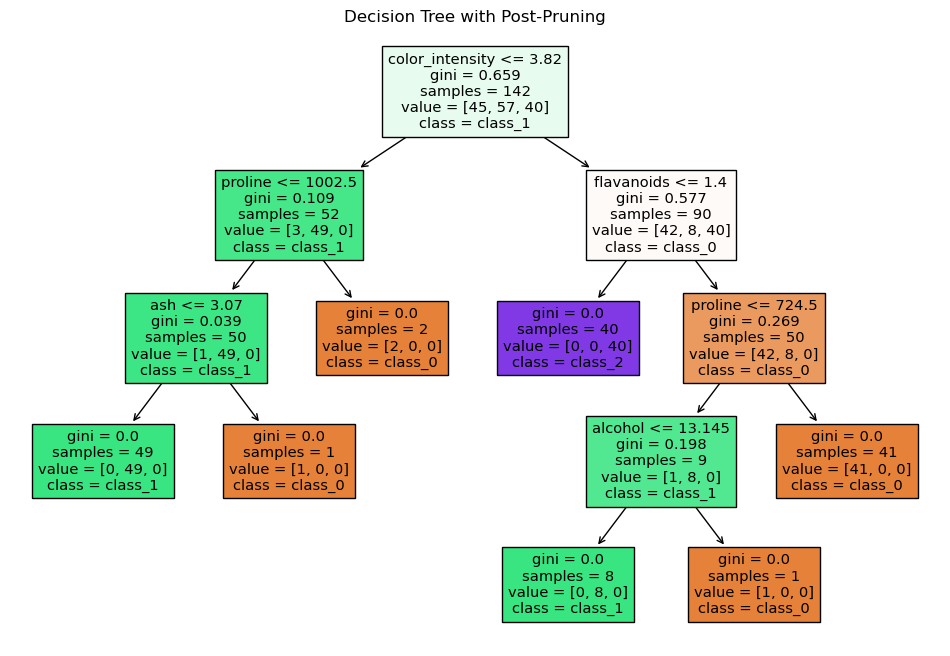

In [55]:
plt.figure(figsize=(12, 8))
plot_tree(final_pruned_tree, feature_names=wine.feature_names, class_names=wine.target_names, filled=True)
plt.title("Decision Tree with Post-Pruning")
plt.show()

In [56]:
y_pred_post = final_pruned_tree.predict(X_test)
print("\nPost-Pruning Accuracy:", accuracy_score(y_test, y_pred_post))


Post-Pruning Accuracy: 0.9444444444444444
